In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from category_encoders import BinaryEncoder
import gradio as gr
import joblib

In [2]:
# https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
movie = pd.read_csv('TMDB_movie_dataset_v11.csv\TMDB_movie_dataset_v11.csv')


# Clean data

In [96]:
movie.shape

(997331, 23)

In [97]:
movie.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [98]:
movie.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [99]:
movie.info

<bound method DataFrame.info of              id                                              title  \
0         27205                                          Inception   
1        157336                                       Interstellar   
2           155                                    The Dark Knight   
3         19995                                             Avatar   
4         24428                                       The Avengers   
...         ...                                                ...   
997326   662207                           Sunny Side of the Street   
997327   662208                                 The Bareback Issue   
997328   662209                                               Push   
997329   662215                          Barely Legal: Fresh Faces   
997330  1248999  Fujairah Call Girls 0526963005 Call Girls Agen...   

        vote_average  vote_count    status release_date     revenue  runtime  \
0              8.364       34495  Released   20

In [100]:
dataThatMaybeUse = movie[['title','vote_average','vote_count','release_date','revenue','original_language','runtime','adult','budget','popularity','genres',"production_companies","production_countries","spoken_languages"]]
dataThatMaybeUse.head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,2010-07-15,825532764,en,148,False,160000000,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,2014-11-05,701729206,en,169,False,165000000,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,en,152,False,185000000,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,2009-12-15,2923706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,2012-04-25,1518815515,en,143,False,220000000,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [101]:
dataThatMaybeUse[dataThatMaybeUse['revenue'] > 0]

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,2010-07-15,825532764,en,148,False,160000000,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,2014-11-05,701729206,en,169,False,165000000,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,en,152,False,185000000,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,2009-12-15,2923706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,2012-04-25,1518815515,en,143,False,220000000,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995846,Brothers,0.000,0,2019-12-25,1000,en,10,False,2000,0.853,Drama,Uncharted Films,Australia,NaN
996003,UFC 246: McGregor vs. Cowboy,0.000,0,2020-01-18,11087629,en,180,False,0,1.215,NaN,NaN,NaN,English
996151,Dhaad,0.000,0,2018-01-05,8,gu,135,False,5,0.852,NaN,NaN,NaN,Gujarati
996358,NICO,0.000,0,2019-06-19,350,en,8,False,80,1.400,Drama,NaN,"Australia, Italy, United Kingdom",English


In [102]:
clean_movie_data = dataThatMaybeUse[dataThatMaybeUse['revenue'] > 0].dropna()

In [103]:
clean_movie_data.shape

(15667, 14)

In [104]:
clean_movie_data.head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,2010-07-15,825532764,en,148,False,160000000,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,2014-11-05,701729206,en,169,False,165000000,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,en,152,False,185000000,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,2009-12-15,2923706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,2012-04-25,1518815515,en,143,False,220000000,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [105]:
clean_movie_data.tail(20)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
979516,Follow the Crows,0.0,0,2019-09-03,4000,en,94,False,3000,1.400,"Thriller, Horror, Drama, Mystery","Berrow Bay Productions, 22six Productions, Inf...",United Kingdom,English
980045,Armen and Me: Armeniya,0.0,0,2018-03-08,30027,ru,77,False,0,0.600,Drama,"Nika Production, Pitchers Studio","Armenia, Russia","Armenian, English, Russian"
980604,Precognition,0.0,0,2019-04-21,1,en,20,False,1,0.601,"Horror, Thriller, Drama, Mystery","Tower Productions, JonGon Productions, J. Frid...",United States of America,English
980653,You're in Trouble,0.0,0,2019-08-18,1,en,25,False,1,0.600,Comedy,Tower Productions,United States of America,English
980658,Assumed,0.0,0,2019-08-24,1,en,32,False,1,0.600,"Science Fiction, Action, Crime, Drama, Mystery...",Tower Productions,United States of America,English
980666,You Know What's Funny?,0.0,0,2019-08-25,1,en,11,False,1,0.600,"Comedy, Drama, Romance",Tower Productions,United States of America,"English, Spanish"
980765,Monsieur Zivaco,0.0,0,1967-10-28,2236617,ja,110,False,0,1.613,"Comedy, Crime","TOHO, Watanabe Productions Co., Ltd.",Japan,Japanese
981030,VIKRUTHA - THE SOCIETAL KILL,0.0,0,2022-02-01,1250,kn,78,False,1850,0.600,"Crime, Action, Mystery",Hydro E11 Studios,India,"English, French, German, Hindi, Kannada, Spani..."
983809,Retrato Azul,0.0,0,2023-08-01,1750,en,8,False,200,0.600,Drama,Pear Production,Brazil,English
983931,Little Olle,0.0,0,2019-11-06,32000,sv,15,False,0,0.600,Drama,"Grand Slam Film Production, Svenska Filminstit...",Sweden,Swedish


In [106]:
clean_movie_data = clean_movie_data[(clean_movie_data['vote_count'] > 10) & (clean_movie_data['budget'] > 0)  & (clean_movie_data['runtime'] > 0)]

In [107]:
clean_movie_data.shape

(8711, 14)

In [108]:
clean_movie_data.tail(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
73732,Armed Response,5.100,11,1986-10-01,1300000,en,86,False,1500000,3.420,"Action, Thriller",CineTel Films,United States of America,English
73901,A Little Night Music,7.200,11,2002-08-22,286000,sr,95,False,200000,1.404,Comedy,Zillion Film,Yugoslavia,Serbian
73903,Amarkalam,6.500,11,1999-08-25,500000,ta,157,False,500000,1.602,"Action, Romance, Drama",Venkateswaralayam,India,Tamil
73980,Wolverine: Origin,6.500,11,2013-07-09,3731,en,71,False,150,5.786,"Animation, Action, Science Fiction",Marvel Knights,United States of America,English
74003,Disappearances,4.682,11,2007-05-11,312642,en,118,False,1500000,2.049,"Action, Adventure, Drama",Moody Street Pictures,United States of America,English


In [109]:
clean_movie_data.release_date = pd.to_datetime(clean_movie_data.release_date)

## sort revenue

In [110]:
clean_movie_data.sort_values(by='revenue',ascending=False).head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
3,Avatar,7.573,29815,2009-12-15,2923706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
15,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,en,181,False,356000000,91.756,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa"
282,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,en,192,False,460000000,241.285,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English
17,Titanic,7.900,23637,1997-11-18,2264162353,en,194,False,200000000,102.348,"Drama, Romance","Paramount, 20th Century Fox, Lightstorm Entert...",United States of America,"English, French, German, Swedish, Italian, Rus..."
56,Star Wars: The Force Awakens,7.293,18352,2015-12-15,2068223624,en,136,False,245000000,66.772,"Adventure, Action, Science Fiction","Lucasfilm Ltd., Bad Robot",United States of America,English


## sort budget

In [111]:
clean_movie_data.sort_values(by='budget',ascending=False).head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
282,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,en,192,False,460000000,241.285,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English
30041,Lost in the Stars,6.330,44,2023-06-22,334039200,zh,122,False,417549000,23.732,"Mystery, Crime, Drama, Thriller","Tao Piao Piao, As One Production",China,"English, Mandarin"
153,Pirates of the Caribbean: On Stranger Tides,6.538,13126,2011-05-15,1045713802,en,137,False,379000000,79.192,"Adventure, Action, Fantasy","Walt Disney Pictures, Jerry Bruckheimer Films,...","United Kingdom, United States of America","English, Spanish"
23,Avengers: Age of Ultron,7.276,21754,2015-04-22,1405403694,en,141,False,365000000,96.565,"Action, Adventure, Science Fiction",Marvel Studios,United States of America,English
15,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,en,181,False,356000000,91.756,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa"


## sort revenue using vote_average , vote_count

In [112]:
clean_movie_data.sort_values(by=['revenue','vote_average','vote_count'],ascending=[False,False,False]).head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
3,Avatar,7.573,29815,2009-12-15,2923706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
15,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,en,181,False,356000000,91.756,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa"
282,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,en,192,False,460000000,241.285,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English
17,Titanic,7.900,23637,1997-11-18,2264162353,en,194,False,200000000,102.348,"Drama, Romance","Paramount, 20th Century Fox, Lightstorm Entert...",United States of America,"English, French, German, Swedish, Italian, Rus..."
56,Star Wars: The Force Awakens,7.293,18352,2015-12-15,2068223624,en,136,False,245000000,66.772,"Adventure, Action, Science Fiction","Lucasfilm Ltd., Bad Robot",United States of America,English


# Make file

In [113]:
clean_movie_data.reset_index(drop=True,inplace=True)
clean_movie_data.head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,2010-07-15,825532764,en,148,False,160000000,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,2014-11-05,701729206,en,169,False,165000000,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,en,152,False,185000000,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,2009-12-15,2923706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,2012-04-25,1518815515,en,143,False,220000000,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [114]:
clean_movie_data.to_csv('clean_movie_data.csv', encoding="utf-8-sig")

In [115]:
clean_movie = pd.read_csv('clean_movie_data.csv')

In [116]:
clean_movie.genres

0                Action, Science Fiction, Adventure
1                 Adventure, Drama, Science Fiction
2                    Drama, Action, Crime, Thriller
3       Action, Adventure, Fantasy, Science Fiction
4                Science Fiction, Action, Adventure
                           ...                     
8706                               Action, Thriller
8707                                         Comedy
8708                         Action, Romance, Drama
8709             Animation, Action, Science Fiction
8710                       Action, Adventure, Drama
Name: genres, Length: 8711, dtype: object

In [117]:
clean_movie = clean_movie.iloc[:,1:]

# Log transformation

In [118]:
clean_movie.revenue.describe(percentiles=[0.25, 0.5, 0.9, 0.99])

count    8.711000e+03
mean     7.588239e+07
std      1.650277e+08
min      1.000000e+00
25%      4.000000e+06
50%      1.890202e+07
90%      1.970795e+08
99%      8.495430e+08
max      2.923706e+09
Name: revenue, dtype: float64

In [119]:
clean_movie.head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,2010-07-15,825532764,en,148,False,160000000,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,2014-11-05,701729206,en,169,False,165000000,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,en,152,False,185000000,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,2009-12-15,2923706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,2012-04-25,1518815515,en,143,False,220000000,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [120]:
log_revenue = np.log(clean_movie.revenue)
log_revenue = log_revenue.to_frame()
log_revenue

,revenue
0,20.531540
1,20.369058
2,20.727814
3,21.796118
4,21.141197
...,...
8706,14.077875
8707,12.563747
8708,13.122363
8709,8.224432


<AxesSubplot:>

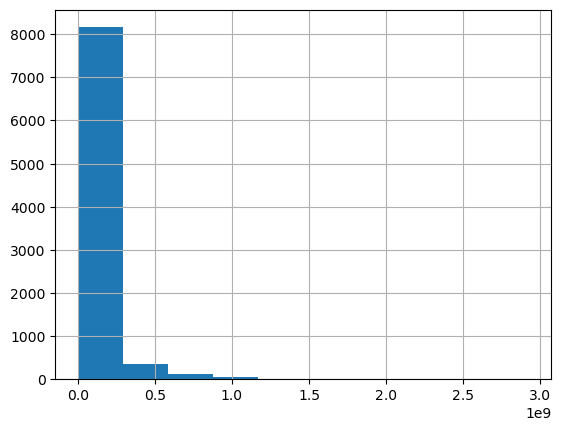

In [121]:
clean_movie.revenue.hist()

<AxesSubplot:>

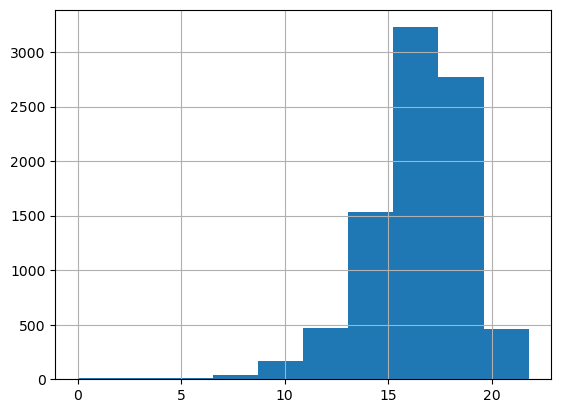

In [122]:
log_revenue.revenue.hist()

In [123]:
scaling_factor = 1000000 
clean_movie['revenue'] = clean_movie['revenue'] / scaling_factor

<AxesSubplot:>

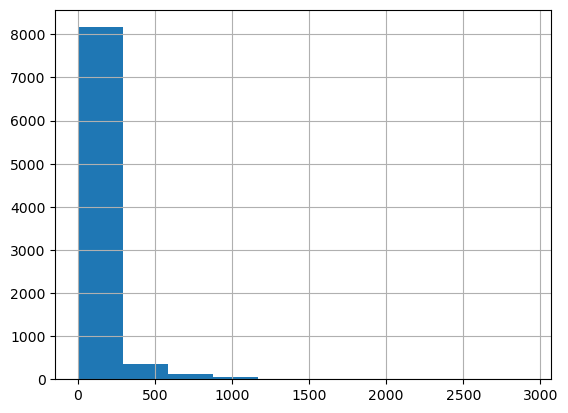

In [124]:
clean_movie.revenue.hist()

In [125]:
time = pd.to_datetime(clean_movie.release_date)
print(time.dt.year.max())
print(time.dt.year.min())

2023
1913


In [126]:
clean_movie

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,2010-07-15,825.532764,en,148,False,160000000,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,2014-11-05,701.729206,en,169,False,165000000,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,2008-07-16,1004.558444,en,152,False,185000000,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,2009-12-15,2923.706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,2012-04-25,1518.815515,en,143,False,220000000,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,Armed Response,5.100,11,1986-10-01,1.300000,en,86,False,1500000,3.420,"Action, Thriller",CineTel Films,United States of America,English
8707,A Little Night Music,7.200,11,2002-08-22,0.286000,sr,95,False,200000,1.404,Comedy,Zillion Film,Yugoslavia,Serbian
8708,Amarkalam,6.500,11,1999-08-25,0.500000,ta,157,False,500000,1.602,"Action, Romance, Drama",Venkateswaralayam,India,Tamil
8709,Wolverine: Origin,6.500,11,2013-07-09,0.003731,en,71,False,150,5.786,"Animation, Action, Science Fiction",Marvel Knights,United States of America,English


In [127]:
vote_count = clean_movie.groupby('vote_count').size().reset_index()
vote_count.rename(columns={0:"freq"}).T

,0,1,2,3,4,5,6,7,8,9,...,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374
vote_count,11,12,13,14,15,16,17,18,19,20,...,25893,26638,27238,27713,28894,29166,29815,30619,32571,34495
freq,59,38,43,36,29,28,32,27,29,14,...,1,1,1,1,1,1,1,1,1,1


In [128]:
clean_movie[clean_movie['vote_count'] > 10]

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,2010-07-15,825.532764,en,148,False,160000000,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,2014-11-05,701.729206,en,169,False,165000000,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,2008-07-16,1004.558444,en,152,False,185000000,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,2009-12-15,2923.706026,en,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,2012-04-25,1518.815515,en,143,False,220000000,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,Armed Response,5.100,11,1986-10-01,1.300000,en,86,False,1500000,3.420,"Action, Thriller",CineTel Films,United States of America,English
8707,A Little Night Music,7.200,11,2002-08-22,0.286000,sr,95,False,200000,1.404,Comedy,Zillion Film,Yugoslavia,Serbian
8708,Amarkalam,6.500,11,1999-08-25,0.500000,ta,157,False,500000,1.602,"Action, Romance, Drama",Venkateswaralayam,India,Tamil
8709,Wolverine: Origin,6.500,11,2013-07-09,0.003731,en,71,False,150,5.786,"Animation, Action, Science Fiction",Marvel Knights,United States of America,English


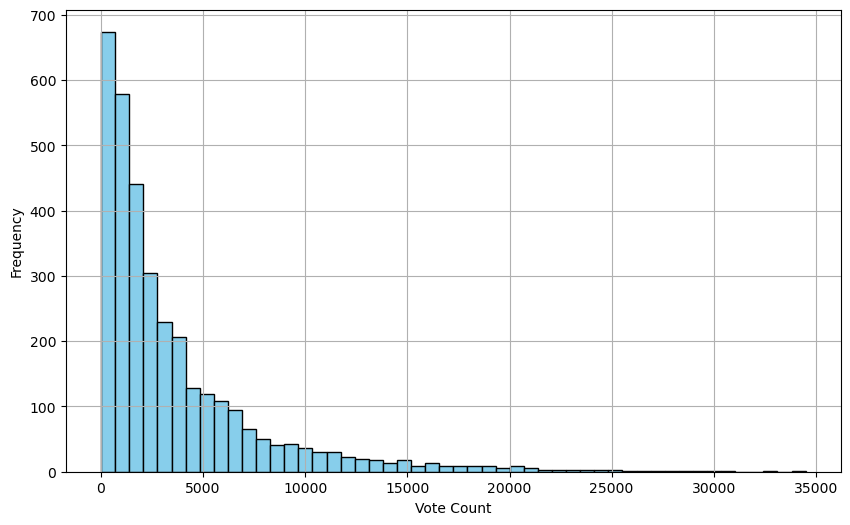

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(vote_count['vote_count'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Perprocessing

## StandardScaler

In [130]:
scaler = StandardScaler()
clean_movie['vote_average'] = scaler.fit_transform(clean_movie[['vote_average']])
clean_movie['budget'] = scaler.fit_transform(clean_movie[['budget']])
clean_movie['popularity'] = scaler.fit_transform(clean_movie[['popularity']])

## LabelEncoder

In [131]:
clean_movie['original_language'].nunique()

50

In [132]:
encoder = LabelEncoder()
clean_movie['original_language'] = encoder.fit_transform(clean_movie[['original_language']])
clean_movie['genres'] = encoder.fit_transform(clean_movie['genres'])
clean_movie['production_companies'] = encoder.fit_transform(clean_movie['production_companies'])
clean_movie['production_countries'] = encoder.fit_transform(clean_movie['production_countries'])
clean_movie['spoken_languages'] = encoder.fit_transform(clean_movie['spoken_languages'])

c:\Users\ETC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
clean_movie.head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,2.236186,34495,2010-07-15,825.532764,9,148,False,3.366275,0.944795,245,3285,745,268
1,Interstellar,2.297400,32571,2014-11-05,701.729206,9,169,False,3.492708,1.802596,407,3284,745,170
2,The Dark Knight,2.407124,30619,2008-07-16,1004.558444,9,152,False,3.998439,1.656330,916,1505,745,446
3,Avatar,1.322595,29815,2009-12-15,2923.706026,9,162,False,5.313339,0.883533,59,1845,809,515
4,The Avengers,1.480828,29166,2012-04-25,1518.815515,9,143,False,4.883468,1.160125,1578,3652,757,354


In [134]:
clean_movie.groupby('genres').size().reset_index(drop=True).to_frame().T

,0,1,2,3,4,5,6,7,8,9,...,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818
0,45,17,2,3,1,1,2,1,1,24,...,4,1,1,1,1,1,1,1,1,2


In [135]:
clean_movie[clean_movie.genres == 0 ].head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
2338,Enter the Dragon,1.151658,1689,1973-08-17,21.485066,9,102,False,-0.426706,0.119500,0,1421,507,91
2667,The Marksman,0.557997,1420,2021-01-15,23.076711,9,108,False,-0.097981,0.156409,0,5378,757,515
2947,Bastille Day,-0.147697,1240,2016-04-22,14.397593,9,92,False,-0.173841,-0.077086,0,5742,448,210
3261,The Man with the Iron Fists,-1.046273,1046,2012-11-02,20.546518,9,96,False,-0.300274,-0.062076,0,428,518,197
3298,Tracers,-0.474557,1028,2015-01-15,0.593683,9,94,False,-0.401420,-0.054212,0,3711,757,170


## Binary encoding

In [136]:
clean_movie['adult'] = clean_movie['adult'].astype(int)

In [137]:
clean_movie.genres

0        245
1        407
2        916
3         59
4       1578
        ... 
8706     260
8707     621
8708     241
8709     519
8710      40
Name: genres, Length: 8711, dtype: int32

## Checking NaN infinite larger value

In [138]:
print(clean_movie.isnull().sum())


title                   0
vote_average            0
vote_count              0
release_date            0
revenue                 0
original_language       0
runtime                 0
adult                   0
budget                  0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
dtype: int64


In [139]:
cov_movie = np.array(clean_movie.drop(['title','release_date'],axis=1),dtype=float)

In [140]:
cov_movie

array([[ 2.23618628e+00,  3.44950000e+04,  8.25532764e+02, ...,
         3.28500000e+03,  7.45000000e+02,  2.68000000e+02],
       [ 2.29740034e+00,  3.25710000e+04,  7.01729206e+02, ...,
         3.28400000e+03,  7.45000000e+02,  1.70000000e+02],
       [ 2.40712363e+00,  3.06190000e+04,  1.00455844e+03, ...,
         1.50500000e+03,  7.45000000e+02,  4.46000000e+02],
       ...,
       [ 8.32996531e-02,  1.10000000e+01,  5.00000000e-01, ...,
         6.68600000e+03,  5.29000000e+02,  9.73000000e+02],
       [ 8.32996531e-02,  1.10000000e+01,  3.73100000e-03, ...,
         3.65100000e+03,  7.57000000e+02,  1.70000000e+02],
       [-2.01645780e+00,  1.10000000e+01,  3.12642000e-01, ...,
         3.89900000e+03,  7.57000000e+02,  1.70000000e+02]])

In [141]:
is_infinite = np.isinf(cov_movie)
print(is_infinite.sum())

0


In [142]:
clean_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8711 entries, 0 to 8710
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 8711 non-null   object 
 1   vote_average          8711 non-null   float64
 2   vote_count            8711 non-null   int64  
 3   release_date          8711 non-null   object 
 4   revenue               8711 non-null   float64
 5   original_language     8711 non-null   int32  
 6   runtime               8711 non-null   int64  
 7   adult                 8711 non-null   int32  
 8   budget                8711 non-null   float64
 9   popularity            8711 non-null   float64
 10  genres                8711 non-null   int32  
 11  production_companies  8711 non-null   int32  
 12  production_countries  8711 non-null   int32  
 13  spoken_languages      8711 non-null   int32  
dtypes: float64(4), int32(6), int64(2), object(2)
memory usage: 748.7+ KB


In [143]:
clean_movie.shape

(8711, 14)

In [144]:
clean_movie[clean_movie['revenue'] > 2147483647]

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages


In [145]:
clean_movie.revenue = clean_movie.revenue.astype(float)

# Train/valid/test split

In [146]:
n_cpus = multiprocessing.cpu_count()
n_cpus

16

In [147]:
clean_movie.head(5)

,title,vote_average,vote_count,release_date,revenue,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,2.236186,34495,2010-07-15,825.532764,9,148,0,3.366275,0.944795,245,3285,745,268
1,Interstellar,2.297400,32571,2014-11-05,701.729206,9,169,0,3.492708,1.802596,407,3284,745,170
2,The Dark Knight,2.407124,30619,2008-07-16,1004.558444,9,152,0,3.998439,1.656330,916,1505,745,446
3,Avatar,1.322595,29815,2009-12-15,2923.706026,9,162,0,5.313339,0.883533,59,1845,809,515
4,The Avengers,1.480828,29166,2012-04-25,1518.815515,9,143,0,4.883468,1.160125,1578,3652,757,354


In [148]:
clean_movie.shape

(8711, 14)

In [149]:
clean_movie.columns 

Index(['title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'original_language', 'runtime', 'adult', 'budget', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages'],
      dtype='object')

In [150]:
x_feature_movies = clean_movie.drop(['revenue','title','release_date'],axis=1)
y_labels_movies = clean_movie['revenue']


In [151]:
x_feature_movies.columns

Index(['vote_average', 'vote_count', 'original_language', 'runtime', 'adult',
       'budget', 'popularity', 'genres', 'production_companies',
       'production_countries', 'spoken_languages'],
      dtype='object')

In [152]:
y_labels_movies

0        825.532764
1        701.729206
2       1004.558444
3       2923.706026
4       1518.815515
           ...     
8706       1.300000
8707       0.286000
8708       0.500000
8709       0.003731
8710       0.312642
Name: revenue, Length: 8711, dtype: float64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(x_feature_movies, y_labels_movies, test_size=0.2, random_state=0)

In [154]:
y_train

7634     3.064000
3733    50.159144
5431    11.129057
6157     1.940234
2172     7.938872
          ...    
4373    13.100000
7891    29.694624
4859    38.058335
3264     9.400000
2732     8.484418
Name: revenue, Length: 6968, dtype: float64

In [155]:
X_train.reset_index(drop=True,inplace=True)
X_train

,vote_average,vote_count,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,0.198798,57,9,130,0,-0.652439,-0.212731,404,3732,757,170
1,0.462134,818,9,95,0,0.230744,-0.065474,854,4487,757,170
2,0.231137,313,9,102,0,-0.376133,-0.148345,1070,4432,757,170
3,-0.282830,202,9,110,0,-0.502566,-0.176233,458,3132,658,170
4,0.159528,1860,9,111,0,-0.300274,0.013374,1117,7008,61,170
...,...,...,...,...,...,...,...,...,...,...,...
6963,0.402075,569,9,94,0,-0.502566,-0.077483,1416,2915,630,170
6964,0.441344,42,37,108,0,-0.502566,-0.202642,1258,1192,658,901
6965,-0.332494,433,9,134,0,0.458323,-0.137418,621,5571,757,170
6966,1.007285,1043,9,116,0,-0.628999,-0.037480,840,4774,377,170


In [156]:
features =['vote_average', 'vote_count', 'runtime', 'budget', 'popularity',
       'genres', 'production_companies', 'production_countries'],

In [157]:
label = 'revenue'

## Linear regression

In [158]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_train_score = linear_regression.score(X_train, y_train)
linear_regression_test_score = linear_regression.score(X_test, y_test)
linear_regression_pred = linear_regression.predict(X_test)
linear_regression_cv_score = cross_val_score(linear_regression,X_train , y_train, cv=5).mean()
linear_regression_test_rmse = np.sqrt(mean_squared_error(y_test,linear_regression_pred))
print("Linear Regression:")
print("Training Score:", linear_regression_train_score)
print("Test Score:", linear_regression_test_score)
print('Predict mean :' ,linear_regression_pred.mean())
print("Mean Cross Validation Score:", linear_regression_cv_score)
print("Mean_Squared_Error:",linear_regression_test_rmse)
# Linear Regression:
# Training Score: 0.6987420388405133
# Test Score: 0.6869856424299619
# Predict mean : 71.94243910209919
# Mean Cross Validation Score: 0.6948441966399453
# Mean_Squared_Error: 92.60608340272637


Linear Regression:
Training Score: 0.6903191328565246
Test Score: 0.734039348640517
Predict mean : 77.75797365974563
Mean Cross Validation Score: 0.6838774676333788
Mean_Squared_Error: 89.46705196267823


## DecisionTreeRegressor

In [159]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train, y_train)
decision_tree_regression_train_score = decision_tree_regression.score(X_train, y_train)
decision_tree_regression_test_score = decision_tree_regression.score(X_test, y_test)
decision_tree_regression_pred = decision_tree_regression.predict(X_test)
decision_tree_regression_cv_score = cross_val_score(decision_tree_regression,X_train , y_train, cv=5).mean()
decision_tree_regression_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree_regression_pred))
print("DecisionTree Regression:")
print("Training Score:", decision_tree_regression_train_score)
print("Test Score:", decision_tree_regression_test_score)
print('Predict mean :' ,decision_tree_regression_pred.mean())
print("Mean Cross Validation Score:", decision_tree_regression_cv_score)
print("Mean_Squared_Error:",decision_tree_regression_test_rmse)

DecisionTree Regression:
Training Score: 1.0
Test Score: 0.45054020924257077
Predict mean : 80.76742289902467
Mean Cross Validation Score: 0.46534448546889406
Mean_Squared_Error: 128.59449917028252


In [160]:
def create_pipeline():
    return make_pipeline(
        make_column_transformer(
            (StandardScaler(), ["vote_average"]),
            (StandardScaler(), ["budget"]),
            (StandardScaler(), ["popularity"]),
            #(LabelEncoder(),['original_language']),
            (LabelEncoder(),['genres']),
            (LabelEncoder(),['production_companies']),
            (LabelEncoder(),['production_countries']),
            #(LabelEncoder(),['spoken_languages']),
            #(BinaryEncoder(), ['adult']),  # Binary encoding for 'adult' column
            remainder="passthrough",
        ),
        DecisionTreeRegressor(random_state=0),
    )

pipeline = create_pipeline()
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler-1',
                                                  StandardScaler(),
                                                  ['vote_average']),
                                                 ('standardscaler-2',
                                                  StandardScaler(),
                                                  ['budget']),
                                                 ('standardscaler-3',
                                                  StandardScaler(),
                                                  ['popularity']),
                                                 ('labelencoder-1',
                                                  LabelEncoder(), ['genres']),
                                                 ('labelencoder-2',
                                                  LabelEncoder(),
                                                  ['production_companies']),
                                                 ('labelencoder-3',
                                                  LabelEncoder(),
                                                  ['production_countries'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [161]:
X_train.columns

Index(['vote_average', 'vote_count', 'original_language', 'runtime', 'adult',
       'budget', 'popularity', 'genres', 'production_companies',
       'production_countries', 'spoken_languages'],
      dtype='object')

In [162]:
X_train

,vote_average,vote_count,original_language,runtime,adult,budget,popularity,genres,production_companies,production_countries,spoken_languages
0,0.198798,57,9,130,0,-0.652439,-0.212731,404,3732,757,170
1,0.462134,818,9,95,0,0.230744,-0.065474,854,4487,757,170
2,0.231137,313,9,102,0,-0.376133,-0.148345,1070,4432,757,170
3,-0.282830,202,9,110,0,-0.502566,-0.176233,458,3132,658,170
4,0.159528,1860,9,111,0,-0.300274,0.013374,1117,7008,61,170
...,...,...,...,...,...,...,...,...,...,...,...
6963,0.402075,569,9,94,0,-0.502566,-0.077483,1416,2915,630,170
6964,0.441344,42,37,108,0,-0.502566,-0.202642,1258,1192,658,901
6965,-0.332494,433,9,134,0,0.458323,-0.137418,621,5571,757,170
6966,1.007285,1043,9,116,0,-0.628999,-0.037480,840,4774,377,170


In [163]:
# pipeline.fit(X_train, y_train)
# score = pipeline.score(X_train, y_train)
# print(f"{score:.3f}")

## GradientBoostingRegressor

In [165]:
gbr_X_train =  X_train.drop(['adult','original_language','production_countries'],axis=1)
gbr_X_test = X_test.drop(['adult','original_language','production_countries'],axis=1)

In [166]:
# param_grid = {
#     'loss':['squared_error', 'absolute_error', 'huber','‘quantile'],
#     'learning_rate' : [0.001,0.01,0.1,0.5,0.9],
#     'n_estimators':[100,200,300],
#     'max_depth':[None,10,20]
# }

# gbr = GradientBoostingRegressor(random_state=42)
# grid_search = GridSearchCV(gbr,param_grid,cv=5,n_jobs=-1)

# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# best_gbr = grid_search.best_estimator_
# gbr_test_score = best_gbr.score(X_test, y_test)
# gbr_pred = best_gbr.predict(X_test)
# gbr_test_rmse = np.sqrt(mean_squared_error(y_test,gbr_pred))

# print("BEST PARA",best_params)
# print("Best score",best_score)
# print("Test score",gbr_test_score)
# print("RMSE",gbr_test_rmse)

In [ ]:
# # Import necessary libraries
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import cross_val_score
# import numpy as np
# from joblib import parallel_backend

# # Create a dictionary to store models and their names
# models = {
#     'Linear Regression': LinearRegression(),
#     'Lasso Regression': Lasso(),
#     'ElasticNet Regression': ElasticNet(),
#     'Decision Tree Regression': DecisionTreeRegressor(),
#     'Random Forest Regression': RandomForestRegressor(),
#     'Gradient Boosting Regression': GradientBoostingRegressor(),
#     'SVR': SVR(),
#     'KNN Regression': KNeighborsRegressor(),
#     'Neural Network Regression': MLPRegressor()
# }

# # Define parameter grids for each algorithm
# param_grids = {
#     'Linear Regression': {},  # No hyperparameters to tune
#     'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},  # Example parameter grid for Lasso
#     'ElasticNet Regression': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},  # Example parameter grid for ElasticNet
#     'Decision Tree Regression': {'max_depth': [None, 10, 20]},  # Example parameter grid for Decision Tree
#     'Random Forest Regression': {'n_estimators': [100, 200, 300],'max_depth': [10, 20,30,40,50], 'min_samples_split': [2, 5,7,10], 'min_samples_leaf': [1, 2,3,5]},  # Example parameter grid for Random Forest
#     'Gradient Boosting Regression': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},  # Example parameter grid for Gradient Boosting
#     'SVR': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1.0, 10.0]},  # Example parameter grid for SVR
#     'KNN Regression': {'n_neighbors': [3, 5, 7]},  # Example parameter grid for KNN
#     'Neural Network Regression': {'hidden_layer_sizes': [(50,), (100,), (200,)], 'alpha': [0.0001, 0.001, 0.01]}  # Example parameter grid for MLPRegressor
# }

# # Create a dictionary to store GridSearchCV objects
# grid_searches = {}

# # Perform GridSearchCV for each algorithm
# for name, model in models.items():
#     print(name + ":")
#     with parallel_backend('threading', n_jobs=10):
#         grid_search = GridSearchCV(model, param_grids[name], cv=5)
#         grid_search.fit(X_train, y_train)
    
#     # Store the GridSearchCV object
#     grid_searches[name] = grid_search
    
#     # Get the best parameters and best score
#     best_params = grid_search.best_params_
#     best_score = grid_search.best_score_
    
#     print("Best Parameters:", best_params)
#     print("Best Score:", best_score)
#     print()

#     # Optionally, you can use the best model for predictions and evaluation
#     best_model = grid_search.best_estimator_
#     train_score = best_model.score(X_train, y_train)
#     test_score = best_model.score(X_test, y_test)
#     pred = best_model.predict(X_test)
#     cv_score = cross_val_score(best_model, X_train, y_train, cv=5).mean()
#     test_rmse = np.sqrt(mean_squared_error(y_test, pred))
    
#     print("Training Score:", train_score)
#     print("Test Score:", test_score)
#     print('Predict mean :' , pred.mean())
#     print("Mean Cross Validation Score:", cv_score)
#     print("Mean Squared Error:", test_rmse)
#     print()


In [167]:
gbr = GradientBoostingRegressor(learning_rate=0.1,loss='absolute_error',max_depth=20,n_estimators = 1000)
gbr.fit(gbr_X_train,y_train)
gbr_test_score = gbr.score(gbr_X_test, y_test)
gbr_pred = gbr.predict(gbr_X_test)
gbr_test_rmse = np.sqrt(mean_squared_error(y_test,gbr_pred))

print(gbr.score(gbr_X_train,y_train))
print(gbr.score(gbr_X_test,y_test))
print("RMSE",gbr_test_rmse)
# 0.9996609065951717
# 0.7687334883496793
# RMSE 79.6001273414456

0.9997169770857877
0.7639082058962923
RMSE 84.29365383340541


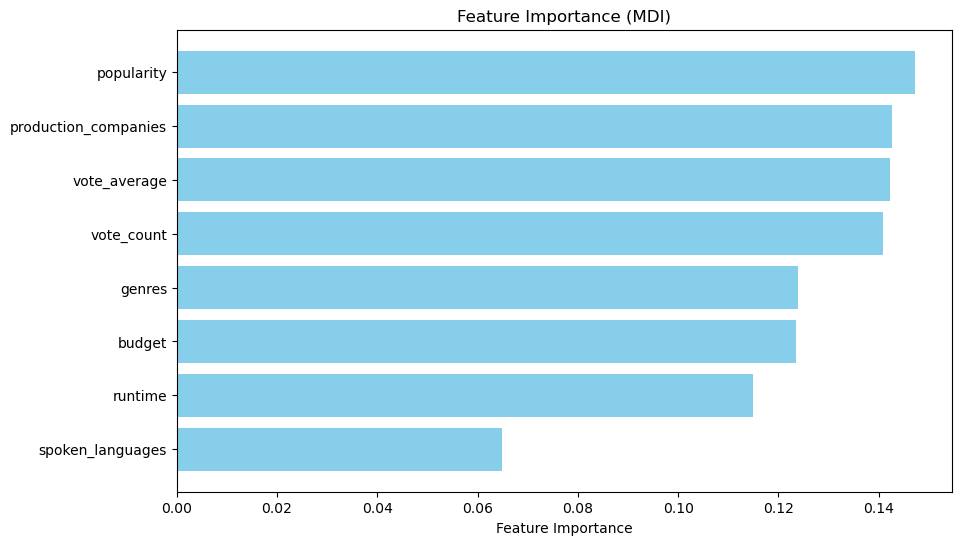

In [168]:
# Assuming you have a list of feature names stored in a variable named 'features'
features = ['vote_average', 'vote_count', 'runtime', #'adult','original_language','production_countries'
            'budget', 'popularity', 'genres', 'production_companies',
             'spoken_languages']

# Assuming you have already trained a Gradient Boosting Regressor model named 'gbr'
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (MDI)')
plt.show()

## Random forest

In [169]:
random_forest_X_train =  X_train.drop(['adult', 'production_countries','spoken_languages','runtime'],axis=1)
random_forest_X_test = X_test.drop(['adult', 'production_countries','spoken_languages','runtime'],axis=1)

In [170]:
len(random_forest_X_train.columns)

7

In [177]:
random_forest = RandomForestRegressor(n_estimators=200, max_depth=10,min_samples_leaf=5,min_samples_split=2, random_state=42)
random_forest.fit(random_forest_X_train, y_train)
random_forest_train_score = random_forest.score(random_forest_X_train, y_train)
random_forest_test_score = random_forest.score(random_forest_X_test, y_test)
random_forest_pred = random_forest.predict(random_forest_X_test)
random_forest_cv_score = cross_val_score(random_forest, random_forest_X_train, y_train, cv=5).mean()
random_forest_test_rmse = np.sqrt(mean_squared_error(y_test,random_forest_pred))
random_forest_mae = mean_absolute_error(y_test,random_forest_pred)
print("Random Forest Regression:")
print("Training Score:", random_forest_train_score)
print("Test Score:", random_forest_test_score)
print('Predict mean :' ,random_forest_pred.mean())
print("Mean Cross Validation Score:", random_forest_cv_score)
print("Mean_Squared_Error:",mean_squared_error(y_test,random_forest_pred))
print("Root Mean_Squared_Error:",random_forest_test_rmse)
print("MAE: ",random_forest_mae)
# Random Forest Regression:
# Training Score: 0.8547455072041221
# Test Score: 0.7834013360556882
# Predict mean : 78.75259285239846
# Mean Cross Validation Score: 0.72855772576559
# Mean_Squared_Error: 6518.754712311467
# Root Mean_Squared_Error: 80.73880549222578
# MAE:  36.06223905834458

Random Forest Regression:
Training Score: 0.8547455072041221
Test Score: 0.7834013360556882
Predict mean : 78.75259285239846
Mean Cross Validation Score: 0.72855772576559
Mean_Squared_Error: 6518.754712311467
Root Mean_Squared_Error: 80.73880549222578
MAE:  36.06223905834458


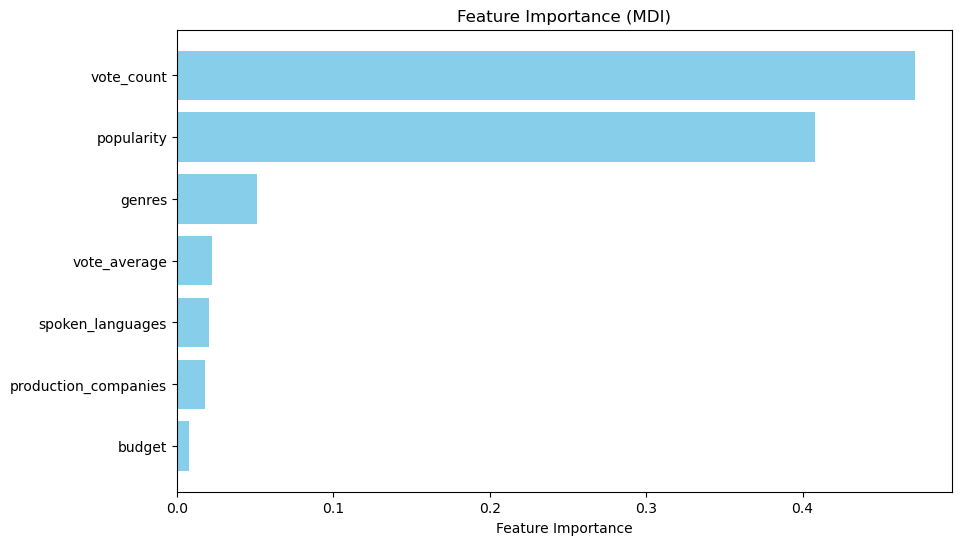

In [172]:
features = ['vote_average', 'vote_count',# 'runtime', #'adult','production_countries', ,'spoken_languages','original_language' ,
          'budget', 'popularity', 'genres', 'production_companies',
          'spoken_languages']

feature_importance = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (MDI)')
plt.show()


In [173]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20,30,40,50],
    'min_samples_split': [2, 5,7,10],
    'min_samples_leaf': [1, 2,3,5]
}

random_forest = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_random_forest = grid_search.best_estimator_
random_forest_test_score = best_random_forest.score(X_test, y_test)
random_forest_pred = best_random_forest.predict(X_test)
random_forest_test_rmse = np.sqrt(mean_squared_error(y_test, random_forest_pred))

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Score:", random_forest_test_score)
print("Mean Squared Error:", random_forest_test_rmse)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7328698918619214
Test Score: 0.785489888220374
Mean Squared Error: 80.34860069480585


## Neural network

In [174]:
#'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'
neural_network = MLPRegressor(activation='identity',hidden_layer_sizes=(100,),
                  alpha=0.0001,random_state=20,early_stopping=False,solver='lbfgs')
neural_network.fit(X_train,y_train)
neural_network_train_score = neural_network.score(X_train,y_train)
neural_network_test_score = neural_network.score(X_test,y_test)
neural_network_pred = neural_network.predict(X_test)
neural_network_cv_score = cross_val_score(neural_network,X_train,y_train,cv=5).mean()
neural_network_test_rmse = np.sqrt(mean_squared_error(y_test, neural_network_pred))
print("Neural network:")
print("Training Score:", neural_network_train_score)
print("Test Score:", neural_network_test_score)
print('Predict mean :' ,neural_network_pred.mean())
print("Mean Cross Validation Score:", neural_network_cv_score)
print("Mean_Squared_Error:",neural_network_test_rmse)
# Neural network:
# Training Score: 0.6973326109914239
# Test Score: 0.682331939115802
# Predict mean : 71.43729704478355
# Mean Cross Validation Score: 0.6945080010696192
# Mean_Squared_Error: 93.2919484575809

c:\Users\ETC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\ETC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\ETC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

Neural network:
Training Score: 0.6823943446666445
Test Score: 0.7087856276509088
Predict mean : 78.62789451018791
Mean Cross Validation Score: 0.67774024280455
Mean_Squared_Error: 93.61831833545786


c:\Users\ETC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [175]:
# param_grid = {
#     'hidden_layer_sizes': [(100,), (100, 100), (200, 200)],
#     'alpha': [0.0001, 0.001, 0.01],
#     'activation':['identity', 'logistic', 'tanh', 'relu'],
#     'solver' :['lbfgs', 'sgd', 'adam']
# }

# neural_network = MLPRegressor(random_state=20)

# grid_search = GridSearchCV(neural_network, param_grid, cv=5, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# best_neural_network = grid_search.best_estimator_
# neural_network_test_score = best_neural_network.score(X_test, y_test)
# neural_network_pred = best_neural_network.predict(X_test)
# neural_network_test_rmse = np.sqrt(mean_squared_error(y_test, neural_network_pred))

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)
# print("Test Score:", neural_network_test_score)
# print("Mean Squared Error:", neural_network_test_rmse)

# Baseline

In [176]:
# Mean and Median Baseline
def mean_baseline(y):
    return np.mean(y)

def median_baseline(y):
    return np.median(y)

# Linear Regression Baseline
def linear_regression_baseline(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    
    return y_pred


mean_revenue = mean_baseline(y_train)
median_revenue = median_baseline(y_train)

print("Mean Revenue Baseline:", mean_revenue)
print("Median Revenue Baseline:", median_revenue)


linear_regression_pred = linear_regression_baseline(X_train, y_train, X_test)

linear_regression_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_pred))
linear_regression_mae = mean_absolute_error(y_test, linear_regression_pred)

print("Linear Regression RMSE:", linear_regression_rmse)
print("Linear Regression MAE:", linear_regression_mae)

Mean Revenue Baseline: 75.52662140355895
Median Revenue Baseline: 19.001018000000002
Linear Regression RMSE: 89.46705196267823
Linear Regression MAE: 43.180438385038116


In [178]:
%%writefile app.py
pipeline = joblib.load("pipeline.joblib")
label_pipeline = joblib.load("label_pipeline.joblib")
movies = joblib.load('movies.joblib')

UsageError: %%writefile is a cell magic, but the cell body is empty.
